[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/api-examples/practical_example.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz

## 1. Plot Genbank File

### 1-1. All Features

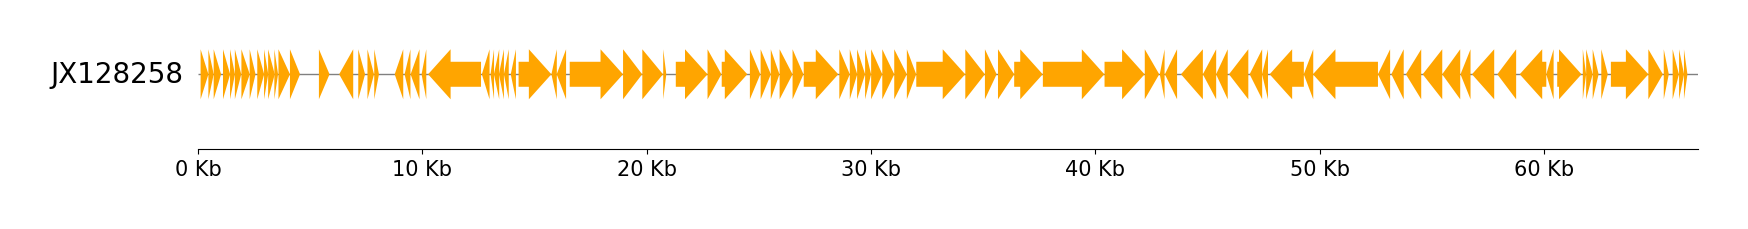

In [2]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

# Load genbank file
gbk_files, _ = load_dataset("escherichia_phage")
gbk = Genbank(gbk_files[0])

# Plot genbank features
gv = GenomeViz(fig_track_height=0.5, tick_style="axis")
track = gv.add_feature_track(gbk.name, gbk.range_size)
track.add_genbank_features(gbk)
fig = gv.plotfig()

### 1-2. Limited Range Features

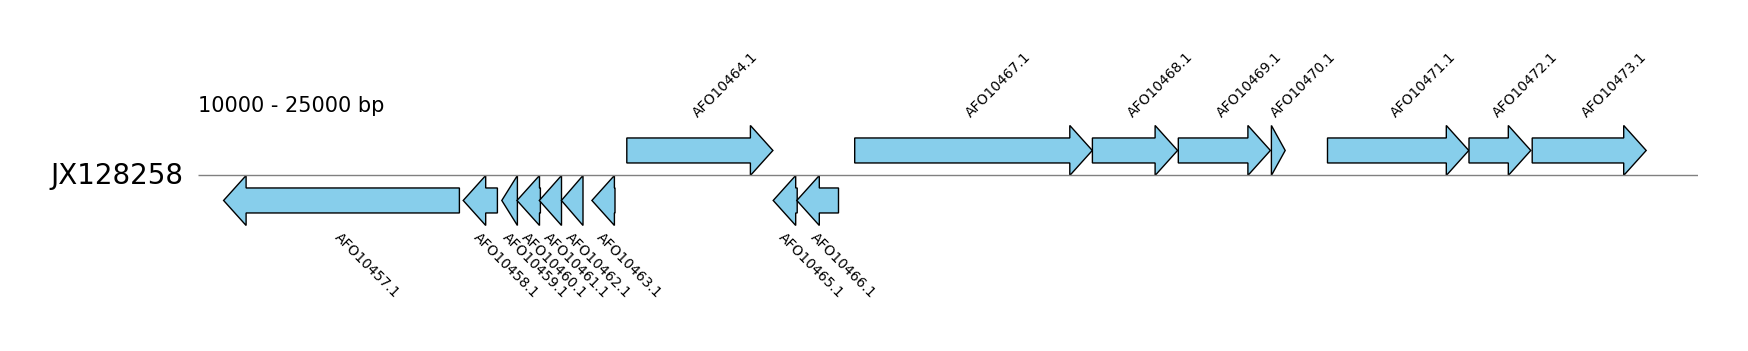

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

# Load genbank file (Set target min-max range)
gbk_files, _ = load_dataset("escherichia_phage")
gbk = Genbank(gbk_files[0], min_range=10000, max_range=25000)

# Plot min-max range genbank features
gv = GenomeViz()
track = gv.add_feature_track(name=gbk.name, size=gbk.range_size, start_pos=gbk.min_range)
track.add_genbank_features(gbk, label_type="protein_id", plotstyle="arrow", facecolor="skyblue", labelsize=10, linewidth=1)
track.set_sublabel(position="top-left")
fig = gv.plotfig()

### 1-3. User-defined Color Style

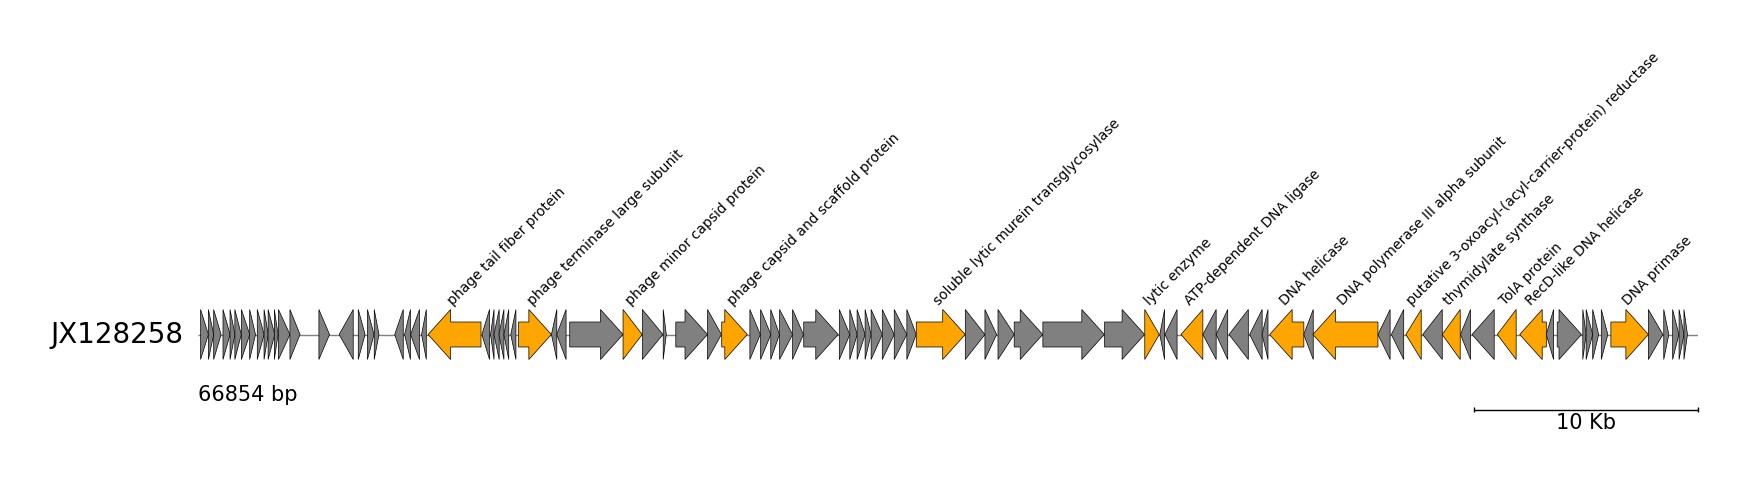

In [4]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

# Load genbank file
gbk_files, _ = load_dataset("escherichia_phage")
gbk = Genbank(gbk_files[0])

# Plot genbank features with `product` label (Exclude`hypothetical ~~~` label)
gv = GenomeViz(fig_track_height=0.5, tick_style="bar")
track = gv.add_feature_track(name=gbk.name, size=gbk.range_size)
track.add_genbank_features(
    gbk,
    label_type="product",
    # Show only product labels that don't startswith `hypothetical` 
    label_handle_func=lambda s: "" if s.startswith("hypothetical") else s,
    labelvpos="top",
    facecolor="skyblue",
    # If label startswith `hypothetical`, facecolor="grey"; if not facecolor="orange"
    facecolor_handle_func=lambda f: "grey" if f.qualifiers.get("product", [""])[0].startswith("hypothetical") else "orange",
    labelsize=10,
    linewidth=0.5,
)
track.set_sublabel(text=f"{gbk.max_range} bp", ymargin=1.0)
fig = gv.plotfig()


## 2. Plot GFF File

### 2-1. All Features

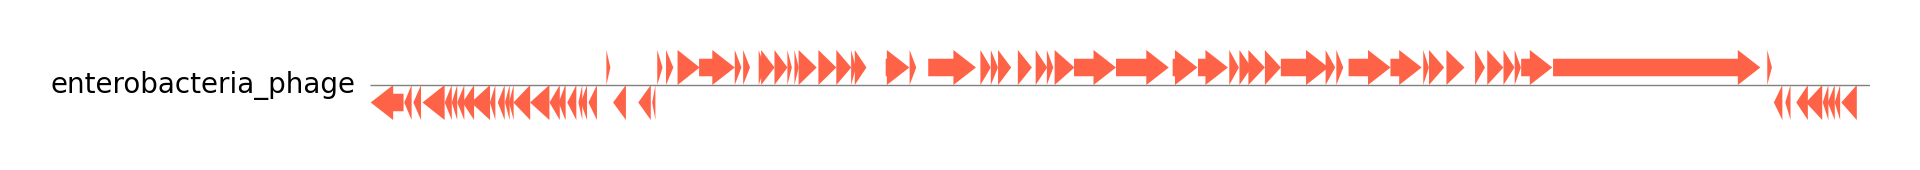

In [5]:
from pygenomeviz import Gff, GenomeViz, load_example_gff

# Load GFF file
gff_file = load_example_gff("enterobacteria_phage.gff")
gff = Gff(gff_file)

# Plot GFF features
gv = GenomeViz(fig_track_height=0.7)
track = gv.add_feature_track(name=gff.name, size=gff.range_size)
track.add_gff_features(gff, plotstyle="arrow", facecolor="tomato")

fig = gv.plotfig()

### 2-2. Limited Range Features

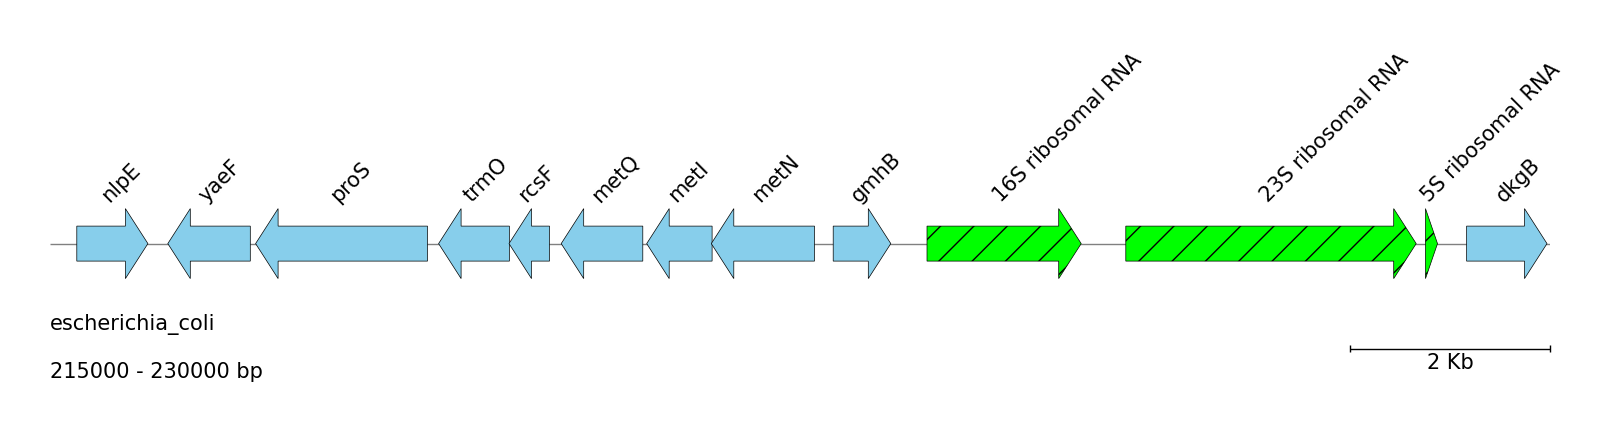

In [6]:
from pygenomeviz import Gff, GenomeViz, load_example_gff

# Load gzipped GFF file (Set target min-max range)
gff_file = load_example_gff("escherichia_coli.gff.gz")
gff = Gff(gff_file, min_range=215000, max_range=230000)

# Plot min-max range `CDS`, `rRNA` type features
gv = GenomeViz(fig_track_height=0.7, tick_style="bar")
track = gv.add_feature_track(name=gff.name, size=gff.range_size, start_pos=gff.min_range, labelsize=0)
track.add_gff_features(gff, feature_type="CDS", facecolor="skyblue", linewidth=0.5, label_type="gene", labelvpos="top")
track.add_gff_features(gff, feature_type="rRNA", facecolor="lime", linewidth=0.5, label_type="product", labelvpos="top", patch_kws=dict(hatch="/"))
track.set_sublabel(f"{gff.name}\n\n{gff.min_range} - {gff.max_range} bp", ymargin=1.0)

fig = gv.plotfig()

### 2-3. User-defined Color Style

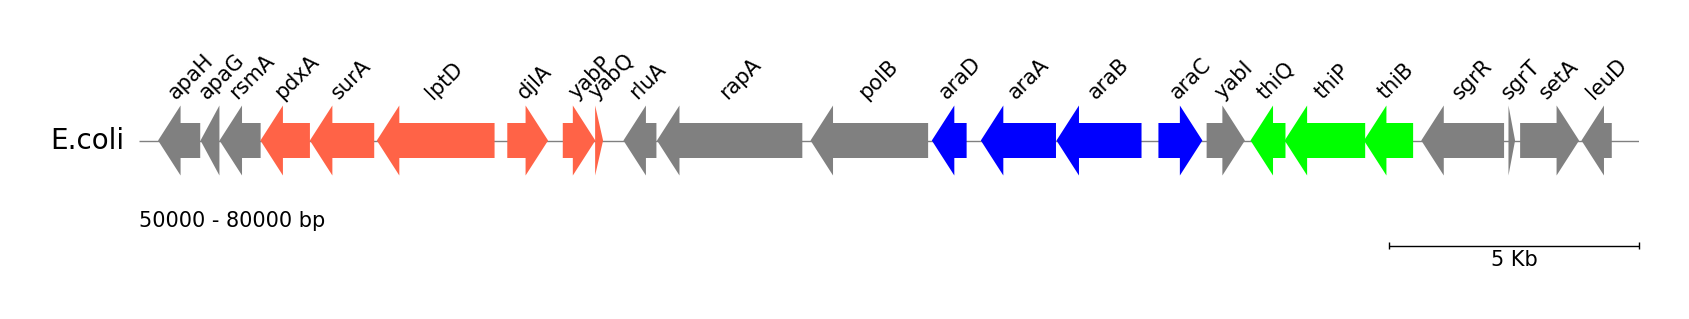

In [7]:
from pygenomeviz import Gff, GenomeViz, load_example_gff
from Bio.SeqFeature import SeqFeature

# Load gzipped GFF file (Set target min-max range)
gff_file = load_example_gff("escherichia_coli.gff.gz")
gff = Gff(gff_file, min_range=50000, max_range=80000)

# Plot min-max range GFF features with sublabel
gv = GenomeViz(fig_track_height=0.7, tick_style="bar")
track = gv.add_feature_track(name="E.coli", size=gff.range_size, start_pos=gff.min_range)
track.set_sublabel(ymargin=1.0)

def facecolor_handle_func(feature: SeqFeature) -> str:
    # Get gene name in GFF attributes column (e.g. `gene=araD;`)
    gene_name = feature.qualifiers.get("gene", [""])[0]
    # Set user-defined color based on gene name
    if gene_name.startswith("ara"):
        return "blue"
    elif gene_name.startswith("thi"):
        return "lime"
    elif gene_name in ("pdxA", "surA", "lptD", "djlA", "yabP", "yabQ"):
        return "tomato"
    else:
        return "grey"

track.add_gff_features(gff, facecolor_handle_func=facecolor_handle_func, label_type="gene", labelvpos="top")

fig = gv.plotfig()

## 3. Plot Genbank Files & Links

### 3-1. Example 1

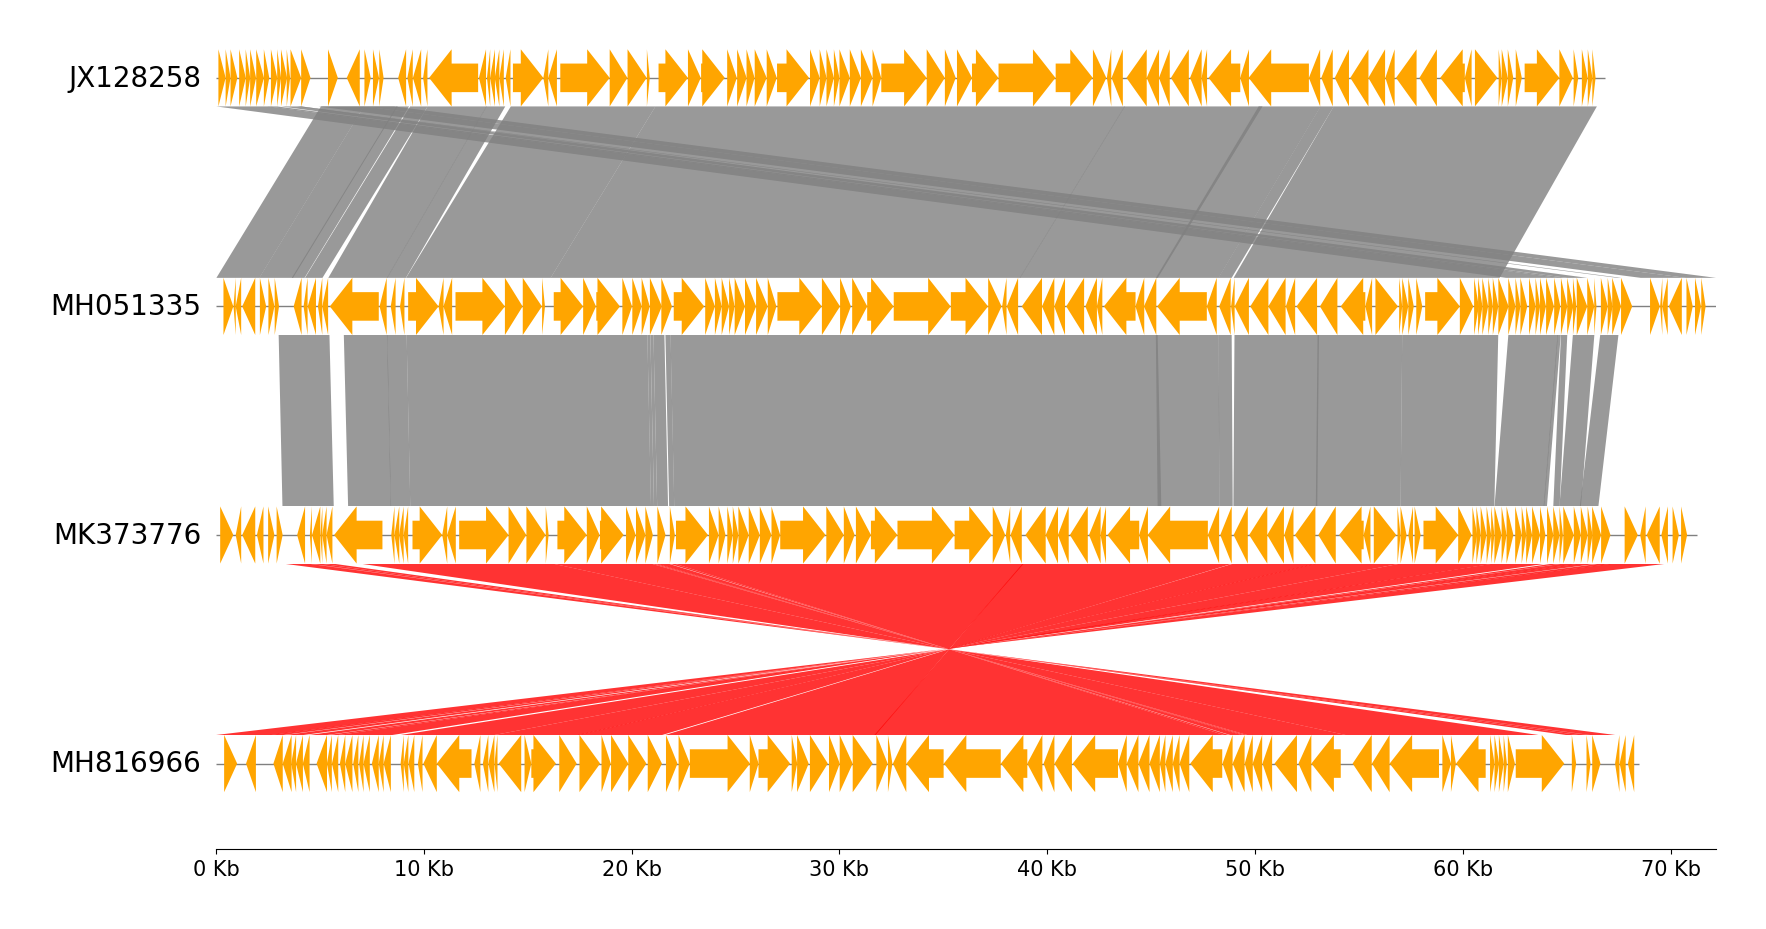

In [8]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(link_track_ratio=3.0, tick_style="axis")

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.range_size)
    track.add_genbank_features(gbk)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2)

fig = gv.plotfig()

### 3-2. Example 2

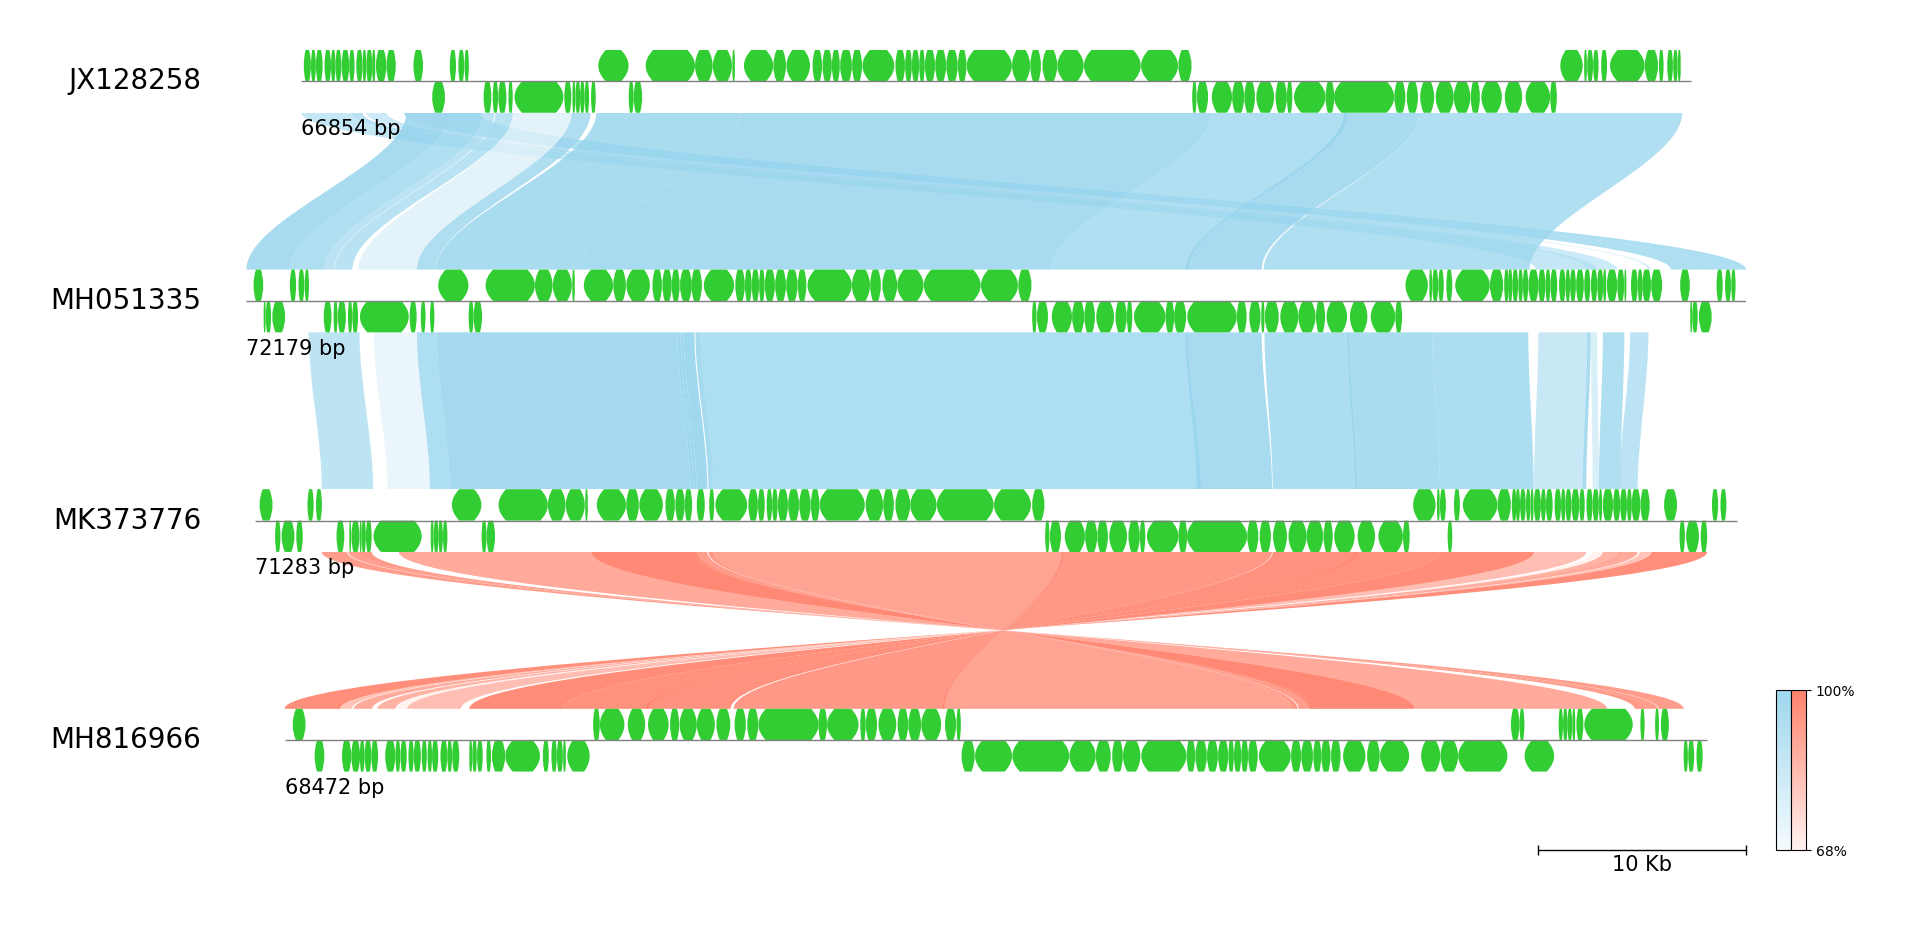

In [9]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    feature_track_ratio=0.4,
    tick_track_ratio=0.5,
    tick_style="bar",
    align_type="center",
)

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.range_size, labelmargin=0.03)
    track.add_genbank_features(gbk, plotstyle="rbox", facecolor="limegreen")
    track.set_sublabel(text=f"{gbk.max_range} bp")

normal_color, inverted_color = "skyblue", "tomato"
min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(
        link_data1,
        link_data2,
        normal_color=normal_color,
        inverted_color=inverted_color,
        v=link.identity,
        vmin=min_identity,
        curve=True,
    )

fig = gv.plotfig()
gv.set_colorbar(fig, bar_colors=[normal_color, inverted_color], vmin=min_identity)